# Sheet

Training data accuracy:  1.0
Test data accuracy:  1.0


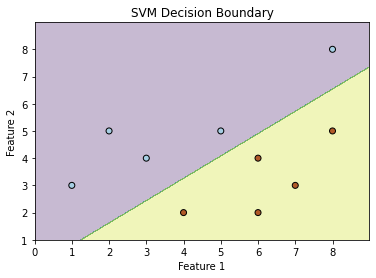

In [1]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

class SVM():
    def __init__(self, alfa, N, lamb):  # Corrected to __init__ from init
        self.alfa = alfa
        self.N = N
        self.lamb = lamb

    def fit(self, X, Y): # x kirivchi Y ha qiqiy natija 
        self.m, self.n = X.shape
        self.w = np.zeros(self.n)
        self.b = 0
        self.X = X
        self.Y = Y
        for i in range(self.N):
            self.update_weights()

    def update_weights(self):
        y_label = np.where(self.Y <= 0, -1, 1)
        for index, x_i in enumerate(self.X):  # Iterate through each sample
            Mi = y_label[index] * (np.dot(x_i, self.w) - self.b) >= 1  # SVM shartining to'g'ri yoki noto'g'ri bajarilganini tekshiradi.
            if Mi:
                dw = 2 * self.lamb * self.w
                db = 0
            else:
                dw = 2 * self.lamb * self.w - np.dot(x_i, y_label[index])
                db = y_label[index]
            self.w = self.w - self.alfa * dw
            self.b = self.b - self.alfa * db #self.w va self.b o'rganish tezligi (alfa) bilan yangilanadi.

    def predict(self, X):
        output = np.dot(X, self.w) - self.b # Kirish ma'lumotlarining og'irliklar bilan chiziqli kombinatsiyasi 
        predicted_labels = np.sign(output)  # Assigning -1 or 1 labels based on the output
        y_hat = np.where(predicted_labels <= -1, 0, 1)  # Converting labels to 0 or 1
        return y_hat

# O'quv ma'lumotlar
X_train = np.array([[1, 3], [2, 5], [3, 4], [8, 8], [5, 5], [4, 2], [6, 2], [6, 4], [7, 3], [8, 5]])
Y_train = np.array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1])

# Sinov ma'lumotlar
X_test = np.array([[5, 6], [6, 6], [9, 4], [10, 7]])
Y_test = np.array([0, 0, 1, 1])

# Initialize and fit the model
ob = SVM(alfa=0.001, N=10000, lamb=0.01)  # Modelni hiperparametrlari bilan boshlash
ob.fit(X_train, Y_train)

# Evaluate accuracy on training data
X_train_prediction = ob.predict(X_train)
training_accuracy = accuracy_score(Y_train, X_train_prediction)
print('Training data accuracy: ', training_accuracy)

# Evaluate accuracy on test data
X_test_prediction = ob.predict(X_test)
test_accuracy = accuracy_score(Y_test, X_test_prediction)
print('Test data accuracy: ', test_accuracy)

# Plot decision boundary
x_min, x_max = np.min(X_train[:, 0]) - 1, np.max(X_train[:, 0]) + 1  # Set axis limits for plotting
y_min, y_max = np.min(X_train[:, 1]) - 1, np.max(X_train[:, 1]) + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))  # Create a grid of points
Z = ob.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3) # Qaror qabul qilish bo'shligini chizadi.
plt.scatter(X_train[:, 0], X_train[:, 1], c=Y_train, cmap=plt.cm.Paired, edgecolors='k') #O'quv nuqtalarini grafikda ko'rsatadi.
plt.title("SVM Decision Boundary")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

# Sheet 2

In [41]:
import tensorflow as tf
x = tf.Variable(4.0)
y = tf.Variable(2.0)

# Qo‘shish
a = x + y

# Ko‘paytirish
b = x * y

print(f"Sum: {a}, Product: {b}")

Sum: 6.0, Product: 8.0


In [21]:
import tensorflow as tf

# Vektorni aniqlash
x = tf.Variable([1.0, 2.0, 3.0], dtype=tf.float32)

# Gradient hisoblash
with tf.GradientTape() as tape:
    tape.watch(x)
    y = 4 * x**2 - 5 * x + 5

dy_dx = tape.gradient(y, x)
print("Gradient:", dy_dx)

Gradient: tf.Tensor([ 3. 11. 19.], shape=(3,), dtype=float32)


In [42]:
import tensorflow as tf

# Parametrlarni aniqlash
x = tf.constant([1.0, 2.0, 3.0], dtype=tf.float32)
k = tf.Variable(2.0, dtype=tf.float32)
b = tf.Variable(1.0, dtype=tf.float32)

# Gradient hisoblash
with tf.GradientTape() as tape:
    y = k * x + b
    f = y * y

# Gradentlar k va b bo‘yicha
grad_k, grad_b = tape.gradient(f, [k, b])
print("Gradient k bo‘yicha:", grad_k)
print("Gradient b bo‘yicha:", grad_b)

Gradient k bo‘yicha: tf.Tensor(68.0, shape=(), dtype=float32)
Gradient b bo‘yicha: tf.Tensor(30.0, shape=(), dtype=float32)


In [23]:
import tensorflow as tf

# Ma'lumotlar
x_data = tf.constant([1.0, 2.0, 3.0, 4.0], dtype=tf.float32)
y_data = tf.constant([3.0, 5.0, 7.0, 9.0], dtype=tf.float32)

# Parametrlarni aniqlash
k = tf.Variable(0.0, dtype=tf.float32)
b = tf.Variable(0.0, dtype=tf.float32)

# Optimizer
optimizer = tf.keras.optimizers.SGD(learning_rate=0.01)

# O‘qitish
for epoch in range(100):
    with tf.GradientTape() as tape:
        y_pred = k * x_data + b
        loss = tf.reduce_mean((y_data - y_pred)**2)
    
    gradients = tape.gradient(loss, [k, b])
    optimizer.apply_gradients(zip(gradients, [k, b]))
    
    if epoch % 10 == 0:
        print(f"Epoch {epoch}: Loss = {loss.numpy()}")

print("Natijalar:")
print(f"k: {k.numpy()}, b: {b.numpy()}")

Epoch 0: Loss = 41.0
Epoch 10: Loss = 1.0733331441879272
Epoch 20: Loss = 0.0396033376455307
Epoch 30: Loss = 0.012169554829597473
Epoch 40: Loss = 0.010811055079102516
Epoch 50: Loss = 0.01016497053205967
Epoch 60: Loss = 0.009572885930538177
Epoch 70: Loss = 0.009015659801661968
Epoch 80: Loss = 0.008490930311381817
Epoch 90: Loss = 0.007996692322194576
Natijalar:
k: 2.072226047515869, b: 0.7876465916633606


In [37]:
import tensorflow as tf

# Oddiy skalyar qiymatga ega o'zgaruvchi
a = tf.Variable(76, dtype=tf.int32)
print("a:", a)

# Float turidagi o'zgaruvchi
b = tf.Variable(4.3453, dtype=tf.float32)
print("b:", b)


# Matritsa shaklida o'zgaruvchi
matrix = tf.Variable([[1, 2], [3, 4]], dtype=tf.int32)
print("Matrix:\n", matrix)

# 3 o'lchovli tensor
tensor = tf.Variable(tf.ones((2, 3, 4)))
print("Tensor:\n", tensor)








a: <tf.Variable 'Variable:0' shape=() dtype=int32, numpy=76>
b: <tf.Variable 'Variable:0' shape=() dtype=float32, numpy=4.3453>
Matrix:
 <tf.Variable 'Variable:0' shape=(2, 2) dtype=int32, numpy=<unavailable>>
Tensor:
 <tf.Variable 'Variable:0' shape=(2, 3, 4) dtype=float32, numpy=<unavailable>>


# Sheet 3

# Sheet 4

In [38]:
import tensorflow as tf

# ======================================
# 1. O‘zgaruvchilarni e‘lon qilish
# ======================================
# Oddiy skalyar qiymat o'zgaruvchi
var1 = tf.Variable(5, dtype=tf.int32)
print("Variable 1:", var1)

# Tensor shaklidagi o'zgaruvchi
var2 = tf.Variable([[1, 2], [3, 4]], dtype=tf.float32)
print("Variable 2:\n", var2)

# ======================================
# 2. O‘zgaruvchi turini o‘zgartirish
# ======================================
var3 = tf.Variable(3.14, dtype=tf.float32)
print("Before casting:", var3)

# Turini int32 ga o'zgartirish
var3_casted = tf.cast(var3, dtype=tf.int32)
print("After casting to int32:", var3_casted)

# ======================================
# 3. O‘zgaruvchilarni random qiymatlar bilan to‘ldirish
# ======================================
# Normal taqsimot
random_normal = tf.Variable(tf.random.normal([3, 3], mean=0, stddev=1))
print("Random Normal Tensor:\n", random_normal)

# Uniform taqsimot
random_uniform = tf.Variable(tf.random.uniform([3, 3], minval=0, maxval=10))
print("Random Uniform Tensor:\n", random_uniform)

# ======================================
# 4. O‘zgaruvchilar ustida amallar
# ======================================
# Qo'shish, ayirish, ko'paytirish, bo'lish
result_add = var2 + 2
print("After addition:\n", result_add)

result_mul = var2 * 3
print("After multiplication:\n", result_mul)

# ======================================
# 1-Masala: y = 4x^2 - 5x + 5 funksiyaning differensiali
# ======================================
def compute_derivative_1(x):
    x = tf.Variable(x, dtype=tf.float32)
    with tf.GradientTape() as tape:
        y = 4 * x**2 - 5 * x + 5
    dy_dx = tape.gradient(y, x)
    return dy_dx

x_vector = tf.constant([1.0, 2.0, 3.0])
derivative_1 = compute_derivative_1(x_vector)
print("1-Masala: Differensial y' = 4x^2 - 5x + 5\n", derivative_1)

# ======================================
# 2-Masala: y = kx + b, f = y^2 funksiyadan k va b bo‘yicha differensial
# ======================================
def compute_derivative_2(x, k, b):
    k = tf.Variable(k, dtype=tf.float32)
    b = tf.Variable(b, dtype=tf.float32)
    with tf.GradientTape(persistent=True) as tape:
        y = k * x + b
        f = y * y
    df_dk = tape.gradient(f, k)
    df_db = tape.gradient(f, b)
    return df_dk, df_db

x_value = tf.constant(2.0)
k_value = 3.0
b_value = 1.0
derivative_2 = compute_derivative_2(x_value, k_value, b_value)
print("2-Masala: Differensial df/dk, df/db\n", derivative_2)

# ======================================
# 3-Masala: GradientTape yordamida chiziqli regressiya
# ======================================
# Ma'lumotlarni yaratish
X = tf.constant([[1.0], [2.0], [3.0], [4.0]])
y_true = tf.constant([[2.0], [4.0], [6.0], [8.0]])

# Og'irliklar va offset (bias) o'zgaruvchilari
a = tf.Variable(0.0)
b = tf.Variable(0.0)

# Gradient descendent
learning_rate = 0.01
for i in range(1000):
    with tf.GradientTape() as tape:
        y_pred = a * X + b
        loss = tf.reduce_mean((y_true - y_pred)**2)  # MSE
    gradients = tape.gradient(loss, [a, b])
    a.assign_sub(learning_rate * gradients[0])
    b.assign_sub(learning_rate * gradients[1])

print("Chiziqli regressiya natijasi:")
print("a (koeffitsiyent):", a.numpy())
print("b (offset):", b.numpy())

Variable 1: <tf.Variable 'Variable:0' shape=() dtype=int32, numpy=5>
Variable 2:
 <tf.Variable 'Variable:0' shape=(2, 2) dtype=float32, numpy=<unavailable>>
Before casting: <tf.Variable 'Variable:0' shape=() dtype=float32, numpy=3.14>
After casting to int32: tf.Tensor(3, shape=(), dtype=int32)
Random Normal Tensor:
 <tf.Variable 'Variable:0' shape=(3, 3) dtype=float32, numpy=<unavailable>>
Random Uniform Tensor:
 <tf.Variable 'Variable:0' shape=(3, 3) dtype=float32, numpy=<unavailable>>
After addition:
 

AttributeError: AttributeError: module 'numpy' has no attribute 'max'